In [3]:
from math import log2

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
def L1(p, q):
	return sum((1/2*abs(p[i]-q[i])) for i in range(len(p)))

In [6]:
def kl_divergence(P_r, P_t):
	return sum(P_r[i] * log2(P_r[i]/P_t[i]) for i in range(len(P_r)))

In [7]:
def EMD(P_r,P_t):
  D = np.ndarray(shape=(l, l))
  for i in range(l):
      for j in range(l):
          D[i,j] = abs(range(l)[i] - range(l)[j])
  A_r = np.zeros((l, l, l))
  A_t = np.zeros((l, l, l))
  for i in range(l):
      for j in range(l):
          A_r[i, i, j] = 1
          A_t[i, j, i] = 1
  A = np.concatenate((A_r.reshape((l, l**2)), A_t.reshape((l, l**2))), axis=0)
  b = np.concatenate((P_r, P_t), axis=0)
  c = D.reshape((l**2))
  from scipy.optimize import linprog
  opt_res = linprog(c, A_eq=A, b_eq=b, bounds=[0, None])
  emd = opt_res.fun
  return emd

# figure 1(a)

In [16]:
def show_metrics_big(total_variation, kl, emd):
    plt.figure(figsize=(6, 3))
    plt.axis("off")

    text = (
        f"Total Variation : {total_variation:.4f}\n"
        f"KL Divergence   : {kl:.4f}\n"
        f"Wasserstein Distance  : {emd:.4f}"
    )

    plt.text(
        0.02, 0.5, text,
        fontsize=18,
        fontweight="bold",
        verticalalignment="center"
    )

    plt.show()

h1:


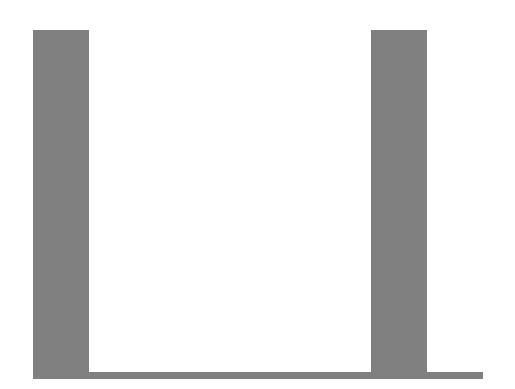

k1:


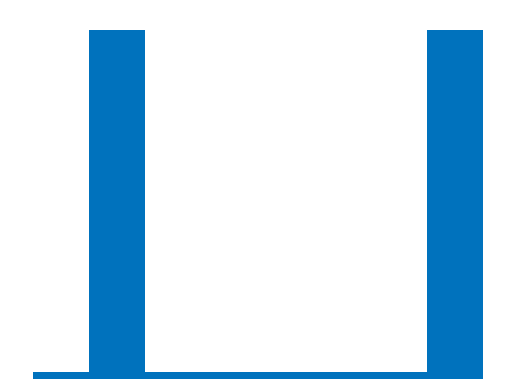

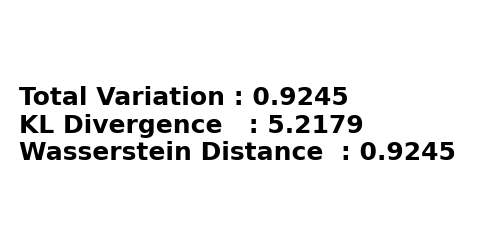

In [17]:
l = 8
P_r = np.array([50, 1,1,1,1,1,50, 1])
P_t = np.array([1, 50,1,1,1,1,1, 50])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("h1:")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("k1:")
plt.show()
total_variation=L1(P_r,P_t)
#print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
#print("KL divergence",kl)
emd=EMD(P_r,P_t)
#print("EMD",emd)
show_metrics_big(total_variation, kl, emd)


h2


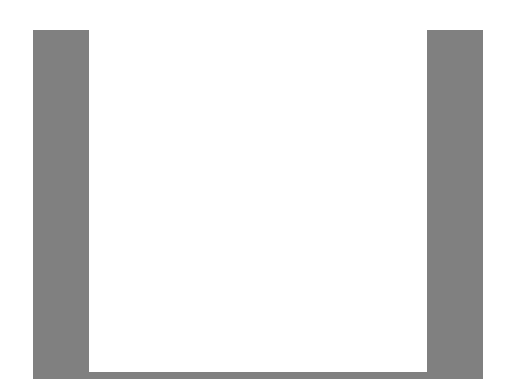

k2


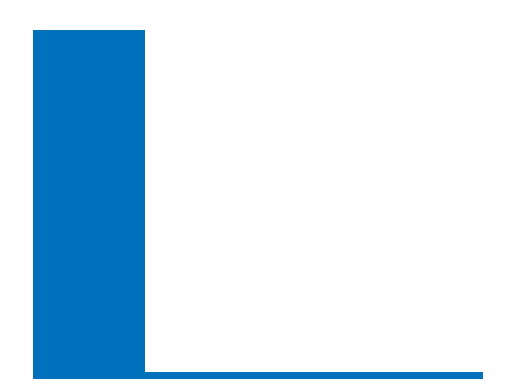

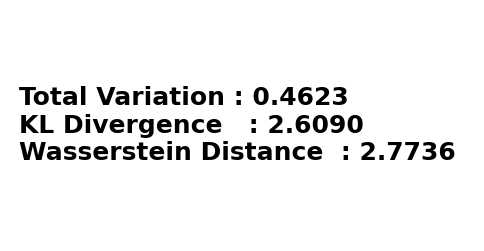

In [18]:
l = 8
P_r = np.array([50, 1,1,1,1,1,1, 50])
P_t = np.array([50, 50,1,1,1,1,1, 1])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("h2")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("k2")
plt.show()
total_variation=L1(P_r,P_t)
#print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
#print("KL divergence",kl)
emd=EMD(P_r,P_t)
#print("EMD",emd)
show_metrics_big(total_variation, kl, emd)

# figure 1(b)

P_r:


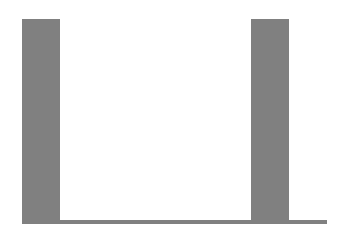

P_t:


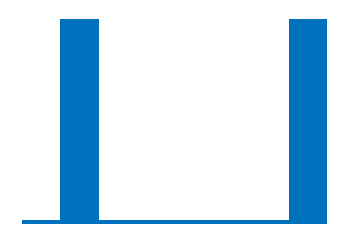

Total variation 0.9245283018867925
KL divergence 5.217904779225689
EMD 0.924528316653888


In [ ]:
l = 8
P_r = np.array([50, 1,1,1,1,1,50, 1])
P_t = np.array([1, 50,1,1,1,1,1, 50])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_r:")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_t:")
plt.show()
total_variation=L1(P_r,P_t)
print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
print("KL divergence",kl)
emd=EMD(P_r,P_t)
print("EMD",emd)

P_r:


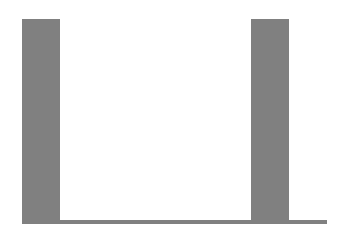

P_t:


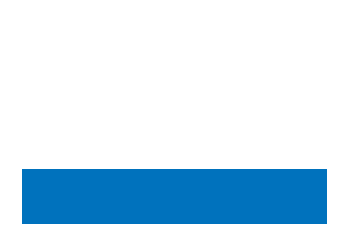

Total variation 0.6933962264150944
KL divergence 1.5964721772997488
EMD 1.1556603907749128


In [ ]:
l = 8
P_r = np.array([50, 1,1,1,1,1,50, 1])
P_t = np.array([13.25,13.25 ,13.25,13.25,13.25,13.25,13.25, 13.25])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_r:")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_t:")
plt.show()
total_variation=L1(P_r,P_t)
print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
print("KL divergence",kl)
emd=EMD(P_r,P_t)
print("EMD",emd)

# Example 3
- Optimal Transport on Discrete Domains - all disjoint/non-overlapping distributions are equidistant according to L1 and KL divergence.
-But EMD is able to differentiate between them.


P_r:


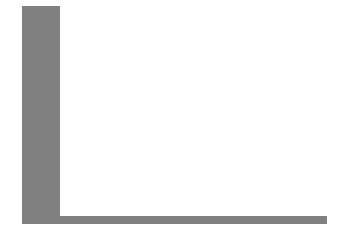

P_t:


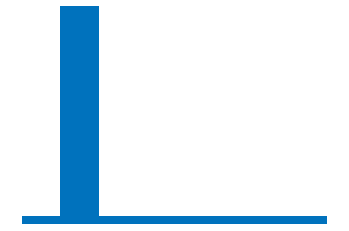

Total variation 0.8596491228070176
KL divergence 4.851736022788798
EMD 0.859649124625069


In [ ]:
l = 8
P_r = np.array([50, 1,1,1,1,1,1, 1])
P_t = np.array([1, 50,1,1,1,1,1, 1])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_r:")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_t:")
plt.show()
total_variation=L1(P_r,P_t)
print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
print("KL divergence",kl)
emd=EMD(P_r,P_t)
print("EMD",emd)

P_r:


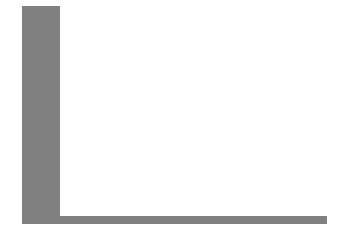

P_t:


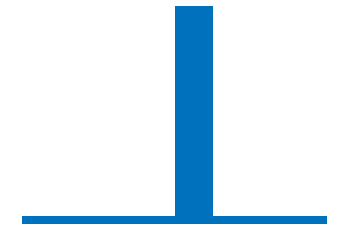

Total variation 0.8596491228070176
KL divergence 4.851736022788798
EMD 3.438596493928356


In [ ]:
l = 8
P_r = np.array([50, 1,1,1,1,1,1, 1])
P_t = np.array([1, 1,1,1,50,1,1, 1])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_r:")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_t:")
plt.show()
total_variation=L1(P_r,P_t)
print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
print("KL divergence",kl)
emd=EMD(P_r,P_t)
print("EMD",emd)

P_r:


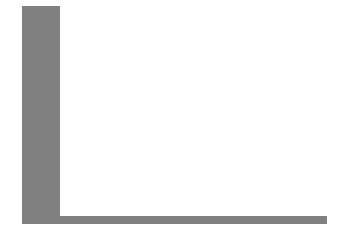

P_t:


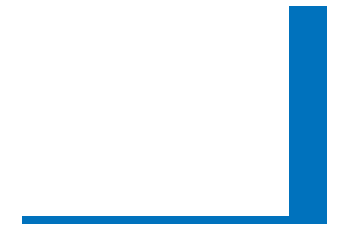

Total variation 0.8596491228070176
KL divergence 4.851736022788798
EMD 6.017543860834918


In [ ]:
l = 8
P_r = np.array([50, 1,1,1,1,1,1, 1])
P_t = np.array([1, 1,1,1,1,1,1, 50])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)
plt.bar(range(l), P_r, 1, color='gray', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_r:")
plt.show()
plt.bar(range(l), P_t, 1, color='#0072BD', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_t:")
plt.show()
total_variation=L1(P_r,P_t)
print("Total variation",total_variation)
kl=kl_divergence(P_r,P_t)
print("KL divergence",kl)
emd=EMD(P_r,P_t)
print("EMD",emd)